# Machine Learning Implementation Code.

In [296]:
!pip install yellowbrick

In [314]:
import urllib.request
import pandas as pd
import requests
import io
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from yellowbrick.classifier import ROCAUC
import time

## Data Reading and Profiling.

In [ ]:
Then,we read the data, from the local machine into our Jupyter Integrated Development Environmennt.

In [7]:
df_model= pd.read_csv('dataset_Facebook.csv', sep=';')
df_model.head(30)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
5,139441,Status,2,12,1,9,0.0,10472,20849,1191,1073,1389,16034,7852,1016,1,152.0,33.0,186
6,139441,Photo,3,12,1,3,1.0,11692,19479,481,265,364,15432,9328,379,3,249.0,27.0,279
7,139441,Photo,3,12,7,9,1.0,13720,24137,537,232,305,19728,11056,422,0,325.0,14.0,339
8,139441,Status,2,12,7,3,0.0,11844,22538,1530,1407,1692,15220,7912,1250,0,161.0,31.0,192
9,139441,Photo,3,12,6,10,0.0,4694,8668,280,183,250,4309,2324,199,3,113.0,26.0,142


In [8]:
df_model.dtypes

Page total likes                                                         int64
Type                                                                    object
Category                                                                 int64
Post Month                                                               int64
Post Weekday                                                             int64
Post Hour                                                                int64
Paid                                                                   float64
Lifetime Post Total Reach                                                int64
Lifetime Post Total Impressions                                          int64
Lifetime Engaged Users                                                   int64
Lifetime Post Consumers                                                  int64
Lifetime Post Consumptions                                               int64
Lifetime Post Impressions by people who have liked y

## Data Cleaning For Machine Learning Implementation
The variable 'Type' which contains the Type of Facebook post, contained in the dataset, was of the object datatype, during the data profiling, It's better to convert it into the Numeric data type, then convert it into a Categorical variable, so our IDE, will recognize the data as a Categorical variable in Numerical format. The 'like' variable was also checked for null values, which was filled with the value of 0, if Null, and since the previous data type was in float. It was changed to an Integer format.

In choosing the variable for our modelling, after our Feature selection, based on our training data, which was supervised, as it contains both the inputs and outputs and our based on our relationship with learning models, the "Filter method of feature selection" was selected, where we plotted a correlation matrix between our 'Target variable', which was 'Type' and the 'Feature matrix', Initially our correlation matrix, resulted in Negative value( of less than 1) for our chosen 'Target variable', which was known as 'Type' and our Feature matrix, which is the 'Like' variable. 

Moreover, we ran a density graph clustering graph, to check for both positive and negative correlation again, fortunately, there was a positive correlation between our 'Target variable' and 'Feature Matrix'. Then we proceeded to delete all our feature variables, as there were no correlation between them and our 'Target Variable'.

There are three basic types of Feature selection methods, which are the Filter, Wrapper and Hybrid types, with a lot of sub-types. The Filter selection method was used because the numbers of features in the Facebook Metrics Dataset was huge, and also to avoid overfitting.

### Brief Explanation of the Filter Feature Selection Method.
In this method, features are filtered based on general characteristics (some metric such as correlation) of the dataset such correlation with the dependent variable. Filter method is performed without any predictive model. It is faster and usually the better approach when the number of features are huge. Avoids overfitting but sometimes may fail to select best features. Apart from correlation matrix, other types of the Feature Selection Method includes the Chi-square, Variance, Information gain(Mutual Information, Fischer ranks and other statisitical methods.)

In [9]:
#convert 'Type' column to numeric 
df_model['Type'] = pd.factorize(df_model['Type'])[0]

In [10]:
df_model["Type"] = df_model["Type"].astype('category')

In [11]:
df_model['like'].fillna(0,inplace=True)

In [13]:
df_model['like'].fillna(0,inplace=True)
df_model["like"] = df_model["like"].astype('int')

In [14]:
df_model.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

In [15]:
df_model1 = df_model.drop(['Page total likes','Category', 'Post Month', 'Post Weekday','Post Hour', 'Paid', 'Lifetime Post Total Reach', 'Lifetime Post Total Impressions', 'Lifetime Engaged Users', 'Lifetime Post Consumers', 'Lifetime Post Consumptions', 'Lifetime Post Impressions by people who have liked your Page', 'Lifetime Post reach by people who like your Page', 'Lifetime People who have liked your Page and engaged with your post', 'comment', 'share', 'Total Interactions'],axis=1)

In [16]:
df_model1.head(50)

,Type,like
0,0,79
1,1,130
2,0,66
3,0,1572
4,0,325
5,1,152
6,0,249
7,0,325
8,1,161
9,0,113


In [17]:
df_model1.dtypes

Type    category
like       int32
dtype: object

In [18]:
len(df_model1.Type)

500

In [19]:
len(df_model1.like)

500

In [20]:
df_model1.count()

Type    500
like    500
dtype: int64

In [21]:
df_model1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Type    500 non-null    category
 1   like    500 non-null    int32   
dtypes: category(1), int32(1)
memory usage: 2.8 KB


In [22]:
df_model1["Type"] = df_model["Type"].astype('int')

In [23]:
df_model1['like'].fillna(0,inplace=True)
df_model1['Type'].fillna(0,inplace=True)

## Conversion of our Feature Matrix into the Appropriate Arrays (1-Dimensional Array, which is a Vector)

In [27]:
y = df_model1['Type']
X = df_model1['like']

In [28]:
arr = X.to_numpy()
arr

array([  79,  130,   66, 1572,  325,  152,  249,  325,  161,  113,  233,
         88,   90,  137,  577,   86,   40,  678,   54,   34,   66,    0,
         16,   72,   99,   88,  412,  100,  523,  143,  107,   27,  155,
         98,   56,  172,   96,   76,  227,   44,  216,  187,   26,   29,
         47,   57,  174,   18,   77,   12,   48,  285,  202,   64,   66,
         65,  164,   40,   76,  139,  101,  144,  179,  219,   60,   77,
         48,  697,   53,   84,  146,  449,  226,  172,   99,  411,    0,
         85,   56,   29,   86,  370,  190,  101,   99,  140,  130,  270,
         30,  107,  331,   78,  301,  111,  124,  153,   51,  115,  310,
        328,    0, 1505,   63,   13,   59,  955,  181,  193,  125,  217,
         28,    0,  117,   79,   15,    4,  431,    7,    7,    6,    2,
        186,    1,    3,    7,    7,  198,    9,    4,    3,    8,    7,
          7,   11,   28,   56,   32,   32,  129,   77,  143,  227,  859,
        377,   41,   76,  189,   80,  148,   24,  3

In [29]:
arr1 = arr.reshape(-1,1)

In [30]:
arr1

array([[  79],
       [ 130],
       [  66],
       [1572],
       [ 325],
       [ 152],
       [ 249],
       [ 325],
       [ 161],
       [ 113],
       [ 233],
       [  88],
       [  90],
       [ 137],
       [ 577],
       [  86],
       [  40],
       [ 678],
       [  54],
       [  34],
       [  66],
       [   0],
       [  16],
       [  72],
       [  99],
       [  88],
       [ 412],
       [ 100],
       [ 523],
       [ 143],
       [ 107],
       [  27],
       [ 155],
       [  98],
       [  56],
       [ 172],
       [  96],
       [  76],
       [ 227],
       [  44],
       [ 216],
       [ 187],
       [  26],
       [  29],
       [  47],
       [  57],
       [ 174],
       [  18],
       [  77],
       [  12],
       [  48],
       [ 285],
       [ 202],
       [  64],
       [  66],
       [  65],
       [ 164],
       [  40],
       [  76],
       [ 139],
       [ 101],
       [ 144],
       [ 179],
       [ 219],
       [  60],
       [  77],
       [  

In [31]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
df_model1

,Type,like
0,0,79
1,1,130
2,0,66
3,0,1572
4,0,325
...,...,...
495,0,53
496,0,53
497,0,93
498,0,91


## Machine Learning Implementation of Multinomial LogisticUsing Stat-Model(Second Approach.)

## Introduction
Logistic regression is a classification algorithm.It is intended for datasets that have numerical input variables and a categorical target variable that has two values or classes. Problems of this type are referred to as binary classification problems. Logistic regression is designed for two-class problems, modeling the target using a binomial probability distribution function. The class labels are mapped to 1 for the positive class or outcome and 0 for the negative class or outcome. The fit model predicts the probability that an example belongs to class 1.

By default, logistic regression cannot be used for classification tasks that have more than two class labels, so-called multi-class classification. Instead, it requires modification to support multi-class classification problems. One popular approach for adapting logistic regression to multi-class classification problems is to split the multi-class classification problem into multiple binary classification problems and fit a standard logistic regression model on each subproblem. Techniques of this type include one-vs-rest and one-vs-one wrapper models.

An alternate approach involves changing the logistic regression model to support the prediction of multiple class labels directly. Specifically, to predict the probability that an input example belongs to each known class label.[2]

The probability distribution that defines multi-class probabilities is called a multinomial probability distribution. A logistic regression model that is adapted to learn and predict a multinomial probability distribution is referred to as Multinomial Logistic Regression.
During the classification of a dependent variable with more than two classes. The Binary Logistic Regression model offers Multinomial extension module.  Multinomial Logistic Regression Analysis has lots of aliases such as: 
**Polytomous Logistic Regression.
Multi-Class Logistic Regression.
Softmax Regression, Multinomial Logit.
Multinomial logit.
Maximum entropy classifier.
Conditional maximum entropy model.**
 Despite the numerous names, the method remains relatively unpopular because it is difficult to interpret and it tends to be inferior to other models when accuracy is the ultimate goal.[1] 
 
Multinomial logistic regression is the generalization of logistic regression algorithm. If the logistic regression algorithm used for the multi-classification task, then the same logistic regression algorithm called as the multinomial logistic regression. The difference in the normal logistic regression algorithm and the multinomial logistic regression in not only about using for different tasks like binary classification or multi-classification task. It is all about using the different functions.

_In the logistic regression, the black-box function which takes the input features and calculates the probabilities of the possible two outcomes is the Sigmoid Function. Later the high probabilities target class is the final predicted class from the logistic regression classifier.When it comes to the multinomial logistic regression the function is the Softmax Function._[3]


In [335]:
pip install scikit-learn -U


  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [32]:

import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import matplotlib.pyplot as plt
df_model1

,Type,like
0,0,79
1,1,130
2,0,66
3,0,1572
4,0,325
...,...,...
495,0,53
496,0,53
497,0,93
498,0,91


In [52]:
X = arr1
y = df_model1.Type



X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 1)
(100, 1)
(400,)
(100,)


In [53]:
model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)
preds = model1.predict(X_test)

#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model1.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': 0,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Intercept And Coefficients: 
The intercept and coefficients are stored in model1.intercept and model1. coef_ respectively. Here we need to spend a bit of time, because the output of Sci-Kit Learn is different from what we may expect. 

In [54]:
#Print model parameters
print('Intercept: \n', model1.intercept_)
print('Coefficients: \n', model1.coef_)

Intercept: 
 [ 2.07923262 -0.34239092  0.29687699 -2.03371869]
Coefficients: 
 [[ 0.00246539]
 [ 0.00257102]
 [-0.00782233]
 [ 0.00278592]]


In [55]:
#Calculate odds ratio estimates
import numpy as np
np.exp(model1.coef_)

array([[1.00246843],
       [1.00257433],
       [0.99220818],
       [1.0027898 ]])

The interpretation of the exponentiated coefficients is for a single unit change in the predictor variable, the odds will be multiplied by a factor indicated by the exponent of the beta coefficient, given that all other variables are held constant.  For example, the first variable is LENGTH with a value of 0.038.  This means  that if length increases by one unit the odds of being female is 3.8% compared to the status when length did not increase by one unit. A generic output looks looks something like this (the below is based on infants!)

Statsmodels:
Notice that the statsmodels output is very different from that of sklearn.  In this case, there are K-1, in this case two equations, which show coefficients against a reference group. In the abalone example, the reference group was chosen to be female. The coefficients represent the log of ratios between two probabilities: the probability of belonging to a group of interest vs. the probability of belonging to the reference group.  In the abalone example, the reference group was female, therefore the equation below represents the first set of coefficients marked as SEX=Infant.  Note that there are two sets of coefficients, one marked as Infant and the second marked as Male.

In [56]:
#Use statsmodels to assess variables

logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
logit_model
result=logit_model.fit()
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

Optimization terminated successfully.
         Current function value: 0.534044
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:                   Type   No. Observations:                  400
Model:                        MNLogit   Df Residuals:                      394
Method:                           MLE   Df Model:                            3
Date:                Wed, 09 Nov 2022   Pseudo R-squ.:                 0.02875
Time:                        03:16:21   Log-Likelihood:                -213.62
converged:                       True   LL-Null:                       -219.94
Covariance Type:            nonrobust   LLR p-value:                  0.005465
    Type=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4216      0.210    -11.527      0.000      -2.833      -2.010
x1             0.0001      0.

So how do we interpret this data?  For example, the coefficient LENGTH is 17.1 for the Infant group.  This means that increasing the LENGTH measurement by one unit will result in an increase by 17.1 units in the log of the ratio between the probability of being an infant vs. the probability of being female.  Very complicated…but that doesn’t matter if the goal is to accurately predict an outcome. 

In [69]:
#Create a confusion matrix
#y_test as first argument and the preds as second argument 
confusion_matrix(y_test, preds)


array([[84,  0,  0,  0],
       [14,  0,  0,  0],
       [ 1,  0,  0,  0],
       [ 1,  0,  0,  0]], dtype=int64)

In [70]:
#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(y_test, preds))

In [71]:
#Create DataFrame from confmtrx array 
#rows for test: Male, Female, Infant designation as index 
#columns for preds: male, predicted_female, predicted_infant as column

pd.DataFrame(confmtrx, index=['Photo','Status', 'Link', 'Video'],
columns=['predicted_Photo', 'predicted_Status', 'predicted_Link', 'Predicted_Video'])

,predicted_Photo,predicted_Status,predicted_Link,Predicted_Video
Photo,84,0,0,0
Status,14,0,0,0
Link,1,0,0,0
Video,1,0,0,0


##  Stats Model Accuracy:

In [72]:
#Accuracy statistics

print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

#Create classification report
class_report=classification_report(y_test, preds)
print(class_report)

Accuracy Score: 0.84
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        84
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1

    accuracy                           0.84       100
   macro avg       0.21      0.25      0.23       100
weighted avg       0.71      0.84      0.77       100



C:\Users\B\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\B\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\B\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
set(y_test) - set(preds)

{1, 2, 3}

The accuracy of this model is rich with only 85% of predictions being correct. Although, the precision and recall for both 1,2,3 status, link and videos are pretty concerning.

## Multinomial Logistic Regression Formula.
Logistic regression is an instance of classification technique that we can use to predict a qualitative response. More specifically, logistic regression models the probability for example if a person will buy a certain product or not in a shopping mall.

That means that, if we are trying to do shopping classification, where the response variable falls into one of the two categories, buy or not-buy, we will use logistic regression models to estimate the probability that the particular person will buy or not.

For example, the probability of buying given gender can be written as:

_Pr(buy=yes|gender)_
 
The values of  Pr(buy=yes|gender)  (abbreviated as  p(gender) ) will range between 0 and 1. Then, for any given value of gender (male or female), a prediction can be made wether the person will buy or not.

Given X as the explanatory or dependent variable and Y as the response or independent variable, how should we then model the relationship between

*p(X)=Pr(Y=1|X)andX*
 
The linear regression model represents these probabilities as:

**p(X)=β0 + β1X**
 
The problem with this approach is that, any time a straight line is fit to a binary response that is coded as 0 or 1, in principle we can always predict  p(X)<0  for some values of  X  and  p(X)>1  for others.

To avoid this problem, you can use the logistic function to model  p(X)  that gives outputs between 0 and 1 for all values of  X :

**p(X)=e(β0+β1X1)1+e(β0+β1X)**
 
The logistic function will always produce an S-shaped curve, so regardless of the value of  X , we will obtain a sensible prediction.

The above equation can also be reframed as:

**p(X)1−p(X)=eβ0+β1X**
 
The quantity  _p(X)1−p(X)_  is called the odds ratio, and can take on any value between 0 and  ∞ . Values of the odds ratio close to 0 and  ∞  indicate very low and very high probabilities of  p(X) , respectively.

By taking the logarithm of both sides from the equation above, you get:

log(p(X)1−p(X))=β0+β1X
 
The left-hand side is called the logit. In a logistic regression model, increasing  X  by one unit changes the logit by  β0 . The amount that  p(X)  changes due to a one-unit change in  X  will depend on the current value of  X . But regardless of the value of  X , if  β1  is positive then increasing  X  will be associated with increasing  p(X) , and if  β1  is negative then increasing  X  will be associated with decreasing  p(X) .

The coefficients  β0  and  β1  are unknown, and must be estimated based on the available training data. For logistic regression, you can use maximum likelihood, a powerful statistical technique. Let's refer back to your gender classification example.

You seek estimates for  β0  and  β1  such that plugging these estimates into the model for  p(X)  yields a number close to 1 for all individuals who are female, and a number close to 0 for all individuals who are not.

This intuition can be formalized using a mathematical equation called a likelihood function:

**l(β0, β1)=p(X)(1 − p(X))**
 
The estimates  β0  and  β1  are chosen to maximize this likelihood function. Once the coefficients have been estimated, you can simply compute the probability of being female given any instance of having longhair. Overall, maximum likelihood is a very good approach to fit non-linear models.

So far, we have only focused on Binomial Logistic Regression, since we were classifying as buyers or non-buyers. Multinomial Logistic Regression model is a simple extension of the binomial logistic regression model, which you use when the exploratory variable has more than two nominal (unordered) categories.

In multinomial logistic regression, the exploratory variable is dummy coded into multiple 1/0 variables. There is a variable for all categories but one, so if there are  N  categories, there will be  N−1  dummy variables. Each category’s dummy variable has a value of 1 for its category and a 0 for all others. One category, the reference category, doesn’t need its own dummy variable, as it is uniquely identified by all the other variables being 0.

The mulitnomial logistic regression then estimates a separate binary logistic regression model for each of those dummy variables. The result is  N−1  binary logistic regression models. Each model conveys the effect of predictors on the probability of success in that category, in comparison to the reference category.

## Sigmoid versus Softmax function

Sigmoid is used for Multi-Label Classification Problem. It means that it has more than one right answer and the output is non-exclusive (e.g. chest x-rays, hospital admission)

When we are building a classifier for a problem with more than one right answer, we apply a sigmoid function to each element of the raw output independently.
The sigmoid function looks like this (notice the number e in there):

σ(zj)=ezj/(1+ezj)

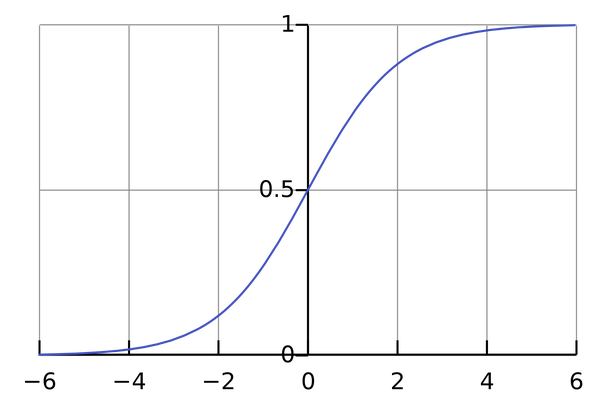!

Here, the sigma symbol σ indicates the sigmoid function. The expression σ(zj) indicates that we are applying the sigmoid function to the number zj. zj indicates a single raw output value, e.g. −0.5. What is the j for? It tells us which of the output values we are using. If we have four output values, we have j=1,2,3,4. So where our raw outputs were [−0.5,1.2,−0.1,2.4], we have z1=−0.5,z2=1.2,z3=−0.1,z4=2.4
Thus we have for z1=−0.5
σ(z1)=σ(−0.5)=e−0.5(1+e−0.5)=0.3775
Softmax is used for Multi-Class Classification Problem that has only one right answer in other words outputs are mutually exclusive outputs (e.g. handwritten digits, irises)

When we are building a classifier for problems with only one right answer, we apply a softmax to the raw outputs.
Applying a softmax takes into account all of the elements of the raw output, in the denominator, which means that the different probabilities produced by the softmax function are interrelated.
The softmax function looks like this:
softmax(zj)=ezj∑k=1kezkforj=1,2,3...k
 
This is similar to the sigmoid function, except in the denominator we sum together  e^  thing for all of the things in our raw output. In other words, when calculating the value of softmax on a single raw output (e.g.  z1 ) we can’t just look at  z1  alone: we have to take into account  z1 ,  z2 ,  z3 , and  z4  in the denominator, like this:

softmax(zj)=ezj∑k=1kezkforj=1,2,3...k
 
softmax(zj)=ez1ez1+ez2+ez3+ez4
 
softmax(zj)=e−0.5e−0.5+e1.2+e−0.1+e2.4=0.0383
 
The softmax function is cool because it ensures that the sum of all our output probabilities will be equal to one.

That means if we are classifying handwritten digits and applying a softmax to our raw outputs, in order for the network, to increase the probability that a particular example is classified as an “6” it needs to decrease the probabilities that the example is classified as some other number(s) (0, 1, 2, 3, 4, 5, 7, 8 and/or 9).


## MLR SKLEARN Usage
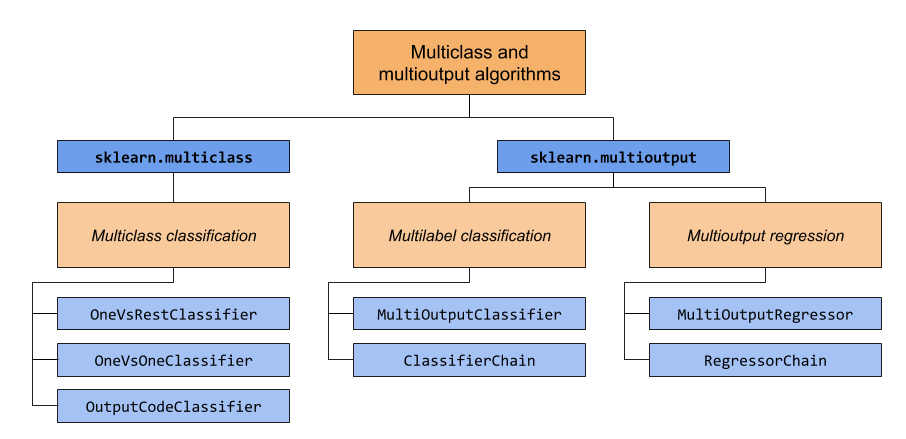!



Logistic regression, despite its name, is a linear model for classification rather than regression.

Logistic regression is implemented in LogisticRegression. This implementation can fit binary, One-vs-Rest, or multinomial logistic regression with optional  l1 ,  l2  or Elastic-Net regularization.

Note : Regularization is applied by default, which is common in machine learning but not in statistics. Another advantage of regularization is that it improves numerical stability. No regularization amounts to setting C to a very high value.

The table below provides a quick reference on the differences between problem types. More detailed explanations can be found in subsequent sections of this guide.
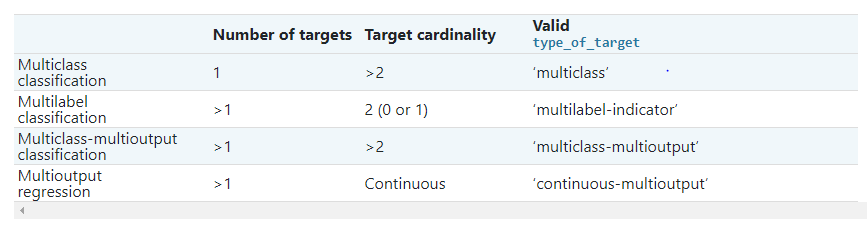!


In [77]:
import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [78]:
facebook_metrics = df_model1

In [79]:
x = df_model1.like
y = df_model1.Type

In [80]:
arr = x.to_numpy()
arr

array([  79,  130,   66, 1572,  325,  152,  249,  325,  161,  113,  233,
         88,   90,  137,  577,   86,   40,  678,   54,   34,   66,    0,
         16,   72,   99,   88,  412,  100,  523,  143,  107,   27,  155,
         98,   56,  172,   96,   76,  227,   44,  216,  187,   26,   29,
         47,   57,  174,   18,   77,   12,   48,  285,  202,   64,   66,
         65,  164,   40,   76,  139,  101,  144,  179,  219,   60,   77,
         48,  697,   53,   84,  146,  449,  226,  172,   99,  411,    0,
         85,   56,   29,   86,  370,  190,  101,   99,  140,  130,  270,
         30,  107,  331,   78,  301,  111,  124,  153,   51,  115,  310,
        328,    0, 1505,   63,   13,   59,  955,  181,  193,  125,  217,
         28,    0,  117,   79,   15,    4,  431,    7,    7,    6,    2,
        186,    1,    3,    7,    7,  198,    9,    4,    3,    8,    7,
          7,   11,   28,   56,   32,   32,  129,   77,  143,  227,  859,
        377,   41,   76,  189,   80,  148,   24,  3

In [81]:
arr1 = arr.reshape(-1,1)

In [82]:
arr1

array([[  79],
       [ 130],
       [  66],
       [1572],
       [ 325],
       [ 152],
       [ 249],
       [ 325],
       [ 161],
       [ 113],
       [ 233],
       [  88],
       [  90],
       [ 137],
       [ 577],
       [  86],
       [  40],
       [ 678],
       [  54],
       [  34],
       [  66],
       [   0],
       [  16],
       [  72],
       [  99],
       [  88],
       [ 412],
       [ 100],
       [ 523],
       [ 143],
       [ 107],
       [  27],
       [ 155],
       [  98],
       [  56],
       [ 172],
       [  96],
       [  76],
       [ 227],
       [  44],
       [ 216],
       [ 187],
       [  26],
       [  29],
       [  47],
       [  57],
       [ 174],
       [  18],
       [  77],
       [  12],
       [  48],
       [ 285],
       [ 202],
       [  64],
       [  66],
       [  65],
       [ 164],
       [  40],
       [  76],
       [ 139],
       [ 101],
       [ 144],
       [ 179],
       [ 219],
       [  60],
       [  77],
       [  

In [83]:
x = arr1
y = df_model1.Type

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.7, random_state = 1)

In [85]:
f_m = linear_model.LogisticRegression()

In [86]:
f_m.fit(x_train, y_train)

LogisticRegression()

In [87]:
y_pred = f_m.predict(x_test)

In [88]:
print("Accuracy of Logistic Regression model is:",
metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of Logistic Regression model is: 86.57142857142858


In [89]:
df_model1

,Type,like
0,0,79
1,1,130
2,0,66
3,0,1572
4,0,325
...,...,...
495,0,53
496,0,53
497,0,93
498,0,91


In [90]:
from sklearn.model_selection import train_test_split
Y = df_model1.Type
X = arr1

#we split the dataset into a test and training set
train_x, test_x, train_y, test_y = train_test_split(X,Y , test_size=0.3, random_state=0)

clf = LogisticRegression(solver='lbfgs',multi_class='multinomial')

clf.fit(train_x, train_y)

clf.score(test_x, test_y)

0.84

## REFERENCES

https://www.datasklr.com/logistic-regression/multinomial-logistic-regression.
    
https://www.kaggle.com/code/saurabhbagchi/multinomial-logistic-regression-for-beginners/notebook
    
https://towardsdatascience.com/cool-scatter-plots-dfb23bebb3dc
    
https://www.kaggle.com/code/kavisekar/features-selection-in-multiple-linear-regression
    
https://www.kaggle.com/code/vitorgamalemos/multinomial-logistic-regression-from-scratch/notebook

https://towardsdatascience.com/ml-from-scratch-multinomial-logistic-regression-6dda9cbacf9d
    
https://machinelearningmastery.com/multinomial-logistic-regression-with-python/
    
https://dataaspirant.com/multinomial-logistic-regression-model-works-machine-learning/

https://dataaspirant.com/implement-multinomial-logistic-regression-python/
    
https://github.com/jacobod/Facebook-Metrics-Prediction/blob/master/FB%20Metrics%20Analysis.ipynb

(Moro et al., 2016) Moro, S., Rita, P., & Vala, B. (2016). Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach. Journal of Business Research, 69(9), 3341-3351.

https://medium.com/@blant.jesse/facebook-marketing-metrics-regression-80dd30ec2fdb
    
https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/
    
https://machinelearningmastery.com/discrete-probability-distributions-for-machine-learning/
    
https://statistics.laerd.com/spss-tutorials/multinomial-logistic-regression-using-spss-statistics.php
    


## Random Forest Classification Algorithm

In [114]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import DistanceMetric as _DistanceMetric
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import joblib
print('Libraries Imported')

Libraries Imported


In [304]:
X = arr1
y = df_model1.Type


In [305]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

In [306]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [307]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [308]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [309]:
print(cross_val_score(model, X, y, cv = 7))
mean_score = cross_val_score(model, X, y,  cv = 7).mean()
std_score = cross_val_score(model, X, y,  cv = 7).std()

print(mean_score)
print(std_score)

[0.80555556 0.69444444 0.72222222 0.76056338 0.83098592 0.78873239
 0.84507042]
0.7781969595349877
0.0379255285236594


In [313]:
def plot_ROC_curve(model, X_train, y_train, X_test, y_test):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'Photo', 
                                        1: 'Status',
                                        2: 'Link',
                                        3: 'Video'})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    
    return visualizer

In [122]:
X_test= model.predict(X_test)
test_data_accuracy = accuracy_score(X_test, y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.808


## Xgboost Classification Algorithm.

In [124]:
!pip install lightgbm


In [145]:
import sys
!{sys.executable} -m pip install xgboost

In [128]:
!pip install catboost

In [130]:
!pip install hyperopt

In [250]:
import time
import math
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sci
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from catboost import Pool, CatBoostClassifier
from hyperopt import hp, tpe, Trials, STATUS_OK
from hyperopt import fmin

from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import naive_bayes 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline

In [340]:
x = arr1
y = df_model1.Type

In [341]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)

In [342]:
lc = LabelEncoder() 

lc = lc.fit(y) 

lc_y = lc.transform(y)

In [343]:
model = XGBClassifier() 
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [344]:
y_pred = model.predict(x_test) 
predictions = [round(value) for value in y_pred]

In [345]:
accuracy = accuracy_score(y_test, predictions) 

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.00%


In [346]:
start = time.time()
accuracy = accuracy_score(y_test, predictions) 

print("Accuracy: %.2f%%" % (accuracy * 100.0))

end = time.time()
diff = end - start
print('Execution time for XGBoost(in Seconds):', diff)




Accuracy: 80.00%
Execution time for XGBoost(in Seconds): 0.0009784698486328125


In [356]:
print(cross_val_score(model, x, y, cv = 7))
mean_score = cross_val_score(model, x, y,  cv = 7).mean()
std_score = cross_val_score(model, x, y,  cv = 7).std()

print(mean_score)
print(std_score)

[0.83333333 0.80555556 0.73611111 0.73239437 0.81690141 0.81690141
 0.84507042]
0.7980382293762575
0.04203740774401438


## Catboost Multi-label  Classification Algorithm

In [324]:
x = arr1
y = df_model1.Type

In [325]:
scaler = MinMaxScaler()
scaler.fit(train_x)
train=scaler.transform(train_x)

In [326]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [327]:
train_pool = Pool(data=train_x, label=train_y)
test_pool = Pool(data=test_x, label=test_y.values) 

In [328]:
start = time.time()

model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    random_strength=0.1,
    depth=8,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    leaf_estimation_method='Newton'
)

end = time.time()
diff = end - start
print('Execution time for CatBoost(in Seconds):', diff)

Execution time for CatBoost(in Seconds): 0.0009846687316894531


In [329]:
model.fit(train_pool,plot=True,eval_set=test_pool)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8650000	test: 0.8000000	best: 0.8000000 (0)	total: 9.69ms	remaining: 9.68s
1:	learn: 0.8650000	test: 0.8000000	best: 0.8000000 (0)	total: 19.3ms	remaining: 9.63s
2:	learn: 0.8650000	test: 0.8000000	best: 0.8000000 (0)	total: 28.5ms	remaining: 9.48s
3:	learn: 0.8650000	test: 0.8000000	best: 0.8000000 (0)	total: 37.2ms	remaining: 9.27s
4:	learn: 0.8650000	test: 0.8000000	best: 0.8000000 (0)	total: 45.4ms	remaining: 9.03s
5:	learn: 0.8650000	test: 0.8000000	best: 0.8000000 (0)	total: 54.2ms	remaining: 8.97s
6:	learn: 0.8650000	test: 0.8000000	best: 0.8000000 (0)	total: 62.6ms	remaining: 8.88s
7:	learn: 0.8650000	test: 0.8000000	best: 0.8000000 (0)	total: 71.5ms	remaining: 8.87s
8:	learn: 0.8650000	test: 0.8000000	best: 0.8000000 (0)	total: 83ms	remaining: 9.14s
9:	learn: 0.8650000	test: 0.8000000	best: 0.8000000 (0)	total: 93.8ms	remaining: 9.29s
10:	learn: 0.8650000	test: 0.8000000	best: 0.8000000 (0)	total: 103ms	remaining: 9.22s
11:	learn: 0.8650000	test: 0.8000000	best: 0.

In [357]:
print(cross_val_score(model, x, y, cv = 7))
mean_score = cross_val_score(model, x, y,  cv = 7).mean()
std_score = cross_val_score(model, x, y,  cv = 7).std()

print(mean_score)
print(std_score)

[0.83333333 0.80555556 0.73611111 0.73239437 0.81690141 0.81690141
 0.84507042]
0.7980382293762575
0.04203740774401438


## Light GBM Multi-Class Classification

In [330]:
x = arr1
y = df_model1.Type

In [331]:
#Scaling using the Standard Scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [332]:
sc_1=StandardScaler()
sc_1.fit(df_model1)
X_1=pd.DataFrame(sc_1.fit_transform(df_model1))

In [347]:
#train-test-split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#Converting the dataset in proper LGB format
d_train=lgb.Dataset(x_train, label=y_train)
#setting up the parameters
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']=1
params['num_class']=4 #no.of unique values in the target class not inclusive of the end value
params['force_col_wise']='true'
params['min_data_in_leaf']='5'
params['min_sum_hessian_in_leaf']='1'
#training the model
clf=lgb.train(params,d_train,100)  #training the model on 100 epocs
#prediction on the test dataset
y_pred_1=clf.predict(x_test)
#printing the predictions
y_pred_1



[LightGBM] [Info] Total Bins 109
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 1
[LightGBM] [Info] Start training from score -0.162519
[LightGBM] [Info] Start training from score -2.380547
[LightGBM] [Info] Start training from score -3.218876
[LightGBM] [Info] Start training from score -4.045554


array([[0.76302773, 0.15150445, 0.01067165, 0.07479616],
       [0.95473549, 0.02842304, 0.00210285, 0.01473862],
       [0.77760248, 0.06039996, 0.15681529, 0.00518227],
       [0.87918463, 0.08797944, 0.02697667, 0.00585926],
       [0.87105361, 0.08716577, 0.02672718, 0.01505344],
       [0.87105361, 0.08716577, 0.02672718, 0.01505344],
       [0.87918463, 0.08797944, 0.02697667, 0.00585926],
       [0.87105361, 0.08716577, 0.02672718, 0.01505344],
       [0.87105361, 0.08716577, 0.02672718, 0.01505344],
       [0.8427999 , 0.11445105, 0.02586025, 0.01688881],
       [0.86896675, 0.08695694, 0.02666314, 0.01741316],
       [0.87105361, 0.08716577, 0.02672718, 0.01505344],
       [0.89684269, 0.06966189, 0.02751848, 0.00597694],
       [0.87918463, 0.08797944, 0.02697667, 0.00585926],
       [0.77760248, 0.06039996, 0.15681529, 0.00518227],
       [0.86896675, 0.08695694, 0.02666314, 0.01741316],
       [0.80689976, 0.16021555, 0.01128525, 0.02159944],
       [0.86896675, 0.08695694,

In [348]:
start = time.time()
#train-test-split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
#Converting the dataset in proper LGB format
d_train=lgb.Dataset(x_train, label=y_train)
#setting up the parameters
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']=1
params['num_class']=4 #no.of unique values in the target class not inclusive of the end value
params['force_col_wise']='true'
params['min_data_in_leaf']='5'
params['min_sum_hessian_in_leaf']='1'
#training the model
clf=lgb.train(params,d_train,100)  #training the model on 100 epocs
#prediction on the test dataset
y_pred_1=clf.predict(x_test)
#printing the predictions
y_pred_1


end = time.time()
diff = end - start
print('Execution time for XGBoost (in Seconds):', diff)

[LightGBM] [Info] Total Bins 99
[LightGBM] [Info] Number of data points in the train set: 350, number of used features: 1
[LightGBM] [Info] Start training from score -0.154151
[LightGBM] [Info] Start training from score -2.361426
[LightGBM] [Info] Start training from score -3.292984
[LightGBM] [Info] Start training from score -4.471639
Execution time for XGBoost (in Seconds): 0.03399944305419922


In [336]:
#argmax() method 
y_pred_1 = [np.argmax(line) for line in y_pred_1]
#printing the predictions
#using precision score for error metrics
precision_score(y_pred_1,y_test,average=None).mean()

0.25

In [358]:
print(cross_val_score(model, x, y, cv = 7))
mean_score = cross_val_score(model, x, y,  cv = 7).mean()
std_score = cross_val_score(model, x, y,  cv = 7).std()

print(mean_score)
print(std_score)

[0.83333333 0.80555556 0.73611111 0.73239437 0.81690141 0.81690141
 0.84507042]
0.7980382293762575
0.04203740774401438


## Naive Bayes Multiclassifer.

In [233]:
X = arr1
Y = df_model1.Type

In [234]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 1/3,random_state = 0)
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('Y_train shape:',Y_train.shape)
print('Y_test shape:',X_test.shape)

X_train shape: (333, 1)
X_test shape: (167, 1)
Y_train shape: (333,)
Y_test shape: (167, 1)


In [235]:
#feature scaling
stdscaler = StandardScaler()
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.transform(X_test)

In [236]:
#naive bayes model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,Y_train)

GaussianNB()

In [239]:
#predicting the result
Y_pred = clf.predict(X_test)
print(Y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [246]:
#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
#accuracy score of the model
print('Accuracy score :',accuracy_score(Y_test,y_pred))

[[140   0   0   0]
 [ 14   0   0   0]
 [ 10   0   0   0]
 [  3   0   0   0]]
Accuracy score : 0.8383233532934131


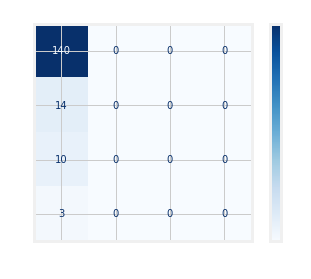

In [249]:
color = 'white'
matrix = plot_confusion_matrix(clf,X_test,Y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [359]:
print(cross_val_score(model, X, Y, cv = 7))
mean_score = cross_val_score(model, X, Y,  cv = 7).mean()
std_score = cross_val_score(model, X, Y,  cv = 7).std()

print(mean_score)
print(std_score)

[0.83333333 0.80555556 0.73611111 0.73239437 0.81690141 0.81690141
 0.84507042]
0.7980382293762575
0.04203740774401438


## K-Nearest Neighbours For Multiclassification.

In [251]:
x = arr1
y = df_model1.Type

In [253]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)
ypred=knn_clf.predict(x_test) #These are the predicted output values

In [257]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[84  1  0  0]
 [ 7  0  0  0]
 [ 6  0  0  0]
 [ 2  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91        85
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         2

    accuracy                           0.84       100
   macro avg       0.21      0.25      0.23       100
weighted avg       0.72      0.84      0.78       100

Accuracy: 0.84


C:\Users\B\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\B\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\B\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Decision Trees For Multiclassification

In [ ]:
x = arr1
y = df_model1.Type

In [258]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify=y, random_state = 42)

In [259]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [261]:
# Model performance on training set
y_pred_train =classifier.predict(x_train)

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
print(classification_report(y_train, y_pred_train))

Accuracy: 0.85
Confusion Matrix: 
 [[319   0   0   0]
 [ 34   0   0   0]
 [ 17   0   0   0]
 [  5   0   0   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       319
           1       0.00      0.00      0.00        34
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00         5

    accuracy                           0.85       375
   macro avg       0.21      0.25      0.23       375
weighted avg       0.72      0.85      0.78       375



C:\Users\B\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\B\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\B\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [263]:
# Predicting the test results
y_pred=classifier.predict(x_test)

# Classification results on test set
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred))

Accuracy: 0.86
Confusion Matrix: 
 [[107   0   0   0]
 [ 11   0   0   0]
 [  5   0   0   0]
 [  2   0   0   0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       107
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         2

    accuracy                           0.86       125
   macro avg       0.21      0.25      0.23       125
weighted avg       0.73      0.86      0.79       125



C:\Users\B\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\B\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\B\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [360]:
print(cross_val_score(model, x, y, cv = 7))
mean_score = cross_val_score(model, x, y,  cv = 7).mean()
std_score = cross_val_score(model, x, y,  cv = 7).std()

print(mean_score)
print(std_score)

[0.83333333 0.80555556 0.73611111 0.73239437 0.81690141 0.81690141
 0.84507042]
0.7980382293762575
0.04203740774401438


[Text(0.5769230769230769, 0.875, 'X[0] <= 46.5\nentropy = 0.798\nsamples = 375\nvalue = [319, 34, 17, 5]'),
 Text(0.3076923076923077, 0.625, 'X[0] <= 11.5\nentropy = 0.823\nsamples = 67\nvalue = [55, 3, 9, 0]'),
 Text(0.15384615384615385, 0.375, 'X[0] <= 5.0\nentropy = 0.267\nsamples = 22\nvalue = [21, 0, 1, 0]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0, 0, 0]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.469\nsamples = 10\nvalue = [9, 0, 1, 0]'),
 Text(0.46153846153846156, 0.375, 'X[0] <= 25.5\nentropy = 1.009\nsamples = 45\nvalue = [34, 3, 8, 0]'),
 Text(0.38461538461538464, 0.125, 'entropy = 1.447\nsamples = 17\nvalue = [9, 3, 5, 0]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.491\nsamples = 28\nvalue = [25, 0, 3, 0]'),
 Text(0.8461538461538461, 0.625, 'X[0] <= 484.5\nentropy = 0.757\nsamples = 308\nvalue = [264, 31, 8, 5]'),
 Text(0.7692307692307693, 0.375, 'X[0] <= 331.0\nentropy = 0.796\nsamples = 287\nvalue = [243, 31, 8, 5]'),
 Tex

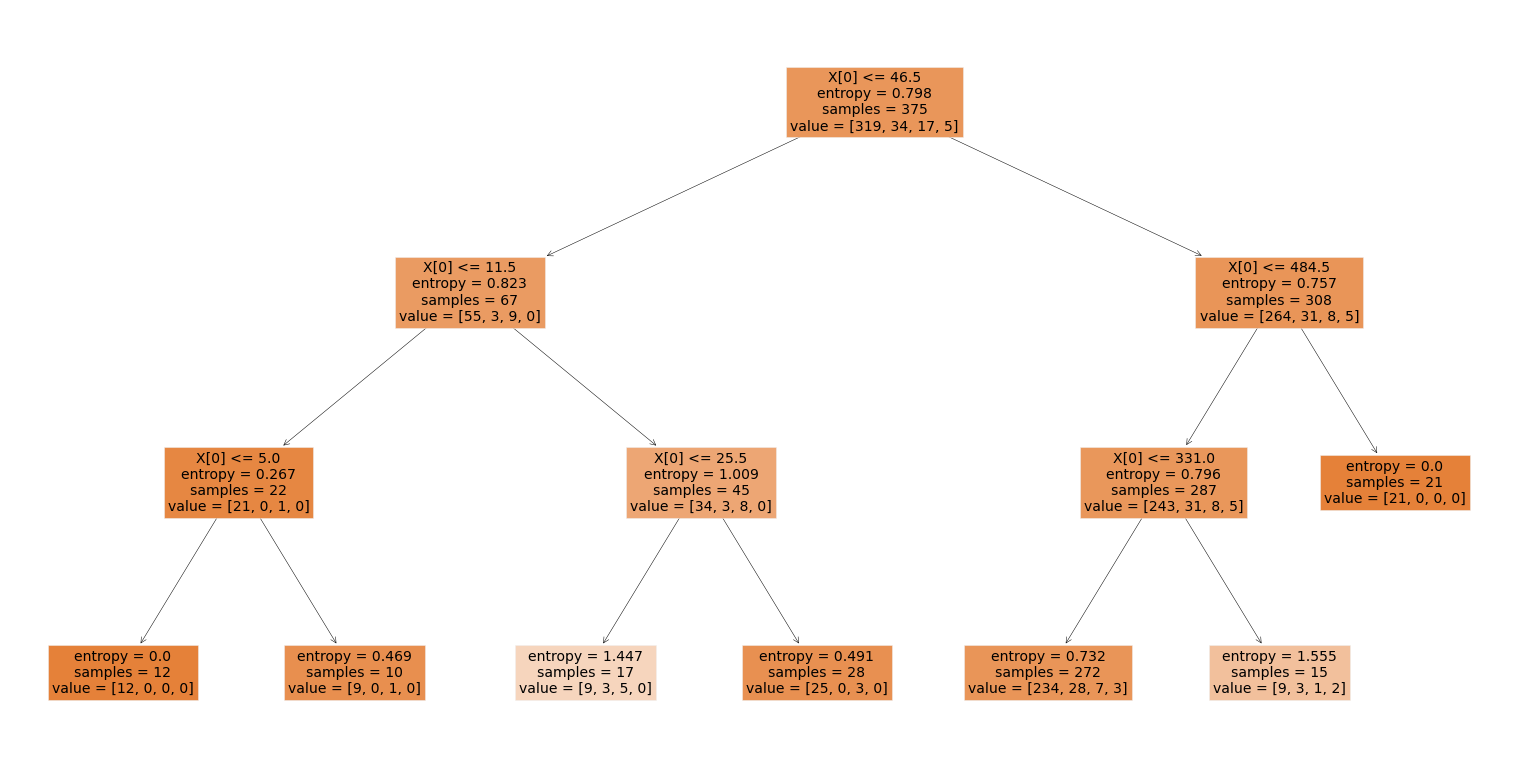

In [282]:
import matplotlib.pyplot as plt
#%matplotlibinline
plt.figure(figsize=(24,14))
tree.plot_tree(classifier, filled=True, fontsize=14)